In [1]:
%matplotlib inline
import numpy as np

from karabo_data import RunDirectory, stack_detector_data
from karabo_data.geometry2 import AGIPD_1MGeometry

In [2]:
run = RunDirectory('/gpfs/exfel/exp/SPB/201831/p900039/proc/r0273/')

In [3]:
tid, train_data = run.select('*/DET/*', 'image.data').train_from_index(60)

In [4]:
stacked = stack_detector_data(train_data, 'image.data')
stacked_pulse = stacked[10]
stacked_pulse.shape

(16, 512, 128)

In [5]:
geom = AGIPD_1MGeometry.from_quad_positions(quad_pos=[
        (-525, 625),
        (-550, -10),
        (520, -160),
        (542.5, 475),
    ])

In [6]:
data, centre = geom.position_all_modules(stacked_pulse)
data.shape

(1296, 1132)

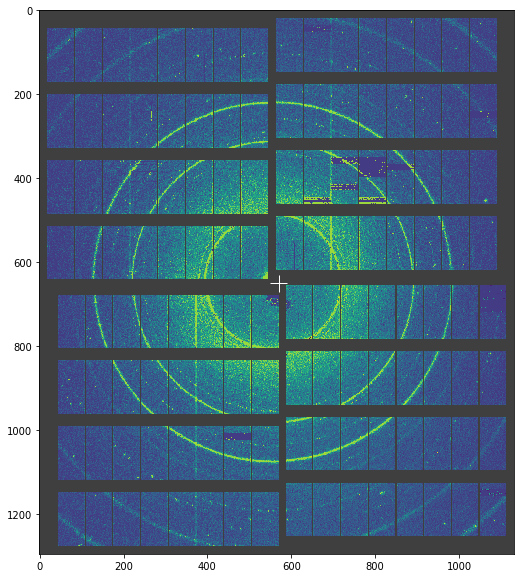

In [7]:
geom.plot_data(np.clip(stacked_pulse, 0, 1000))